In [3]:
import pandas as pd
import tensorflow as tf


print(tf.__version__)



df=pd.read_csv("wine.csv")
df.head()

df.isnull().sum()

df.dtypes

df['quality']=df['quality'].replace({"good":1,"bad":0})


x=df.drop("quality" ,axis=1)
x.head()

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=ss.get_feature_names_out())
x.head()

2.13.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [4]:
y=df['quality']
y.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


x_train.shape,x_test.shape

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)


x_train.shape, x_val.shape


((717, 11), (354, 11))

In [5]:
layer=[
    tf.keras.layers.Input(shape=(11,),name='inputLayer'),
    tf.keras.layers.Dense(64,activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(8,activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(2,activation="sigmoid", name="outputLayer"),
    ]

In [6]:
model_clf = tf.keras.models.Sequential(layer)

In [7]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 hiddenLayer2 (Dense)        (None, 8)                 520       
                                                                 
 outputLayer (Dense)         (None, 2)                 18        
                                                                 
Total params: 1306 (5.10 KB)
Trainable params: 1306 (5.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"#function(‘binary_crossentropy’),
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [14]:
import time
import os
def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_10_12_13_26_55


In [10]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [15]:

checkpointing_cb = tf.keras.callbacks.ModelCheckpoint("Model_ckpt.h5", save_best_only=True)

In [16]:
his=model_clf.fit(x_train, y_train,epochs=50,batch_size=5,validation_data=(x_val,y_val),callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])

Epoch 1/50
144/144 [==============================] - 6s 6ms/step - loss: 0.6617 - accuracy: 0.6276 - val_loss: 0.6202 - val_accuracy: 0.7147
Epoch 2/50
 55/144 [==========>...................] - ETA: 0s - loss: 0.6254 - accuracy: 0.6836

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


144/144 [==============================] - 1s 4ms/step - loss: 0.6183 - accuracy: 0.6876 - val_loss: 0.5820 - val_accuracy: 0.7119
Epoch 3/50
144/144 [==============================] - 1s 4ms/step - loss: 0.5860 - accuracy: 0.7113 - val_loss: 0.5589 - val_accuracy: 0.7373
Epoch 4/50
144/144 [==============================] - 1s 4ms/step - loss: 0.5647 - accuracy: 0.7127 - val_loss: 0.5361 - val_accuracy: 0.7486
Epoch 5/50
144/144 [==============================] - 1s 4ms/step - loss: 0.5451 - accuracy: 0.7266 - val_loss: 0.5179 - val_accuracy: 0.7542
Epoch 6/50
144/144 [==============================] - 1s 4ms/step - loss: 0.5295 - accuracy: 0.7378 - val_loss: 0.5121 - val_accuracy: 0.7571
Epoch 7/50
144/144 [==============================] - 1s 4ms/step - loss: 0.5193 - accuracy: 0.7392 - val_loss: 0.5062 - val_accuracy: 0.7571
Epoch 8/50
144/144 [==============================] - 1s 4ms/step - loss: 0.5123 - accuracy: 0.7434 - val_loss: 0.5062 - val_accuracy: 0.7627
Epoch 9/50
144/14

<Axes: >

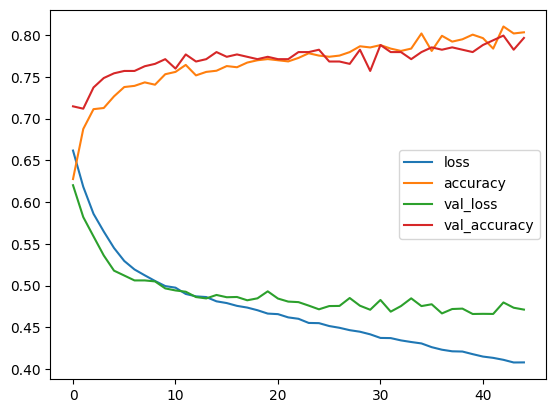

In [17]:
pd.DataFrame(his.history).plot()

In [18]:
model_clf.evaluate(x_test,y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7538


[0.5177578330039978, 0.7537878751754761]

In [19]:
y_pred=model_clf.predict(x_test)

17/17 [==============================] - 0s 2ms/step


In [20]:
y_pred

array([[0.5375431 , 0.6738599 ],
       [0.7833918 , 0.52847373],
       [0.5159312 , 0.77807724],
       ...,
       [0.2612933 , 0.9598907 ],
       [0.9111305 , 0.30917707],
       [0.6251159 , 0.5503651 ]], dtype=float32)